# EDGE DETECTION & ENCHANCMENT



In [1]:
# imports and installs
%pip install matplotlib
%pip install scipy 
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import scipy.ndimage as ndimage

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 8.0/8.0 MB 60.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 49.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 43.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   --------------------- ------------------ 23.9/43.6 MB 116.9 MB/s eta 0:00:01
   ---------------------------------------  43.5/43.6 MB 116.6 MB/s eta 0:00:01
   ---------------------------------------- 43.6/43.6 MB 89.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


**LOAD IMAGES:**

In [2]:
london1980 = cv.imread("london-1980.jpg", cv.IMREAD_GRAYSCALE)
london1880 = cv.imread("london1880.jpeg", cv.IMREAD_GRAYSCALE)
londonStreetLife = cv.imread("1980s_London_street_life.jpg", cv.IMREAD_GRAYSCALE)
woodenTable = cv.imread("wooden_table.jpeg", cv.IMREAD_GRAYSCALE)

# Display image
cv.imshow("london1980", london1980)
cv.imshow("london1880", london1880)
cv.imshow("londonStreetLife", londonStreetLife)
cv.imshow("wooden Table", woodenTable)
cv.waitKey(0)
cv.destroyAllWindows()

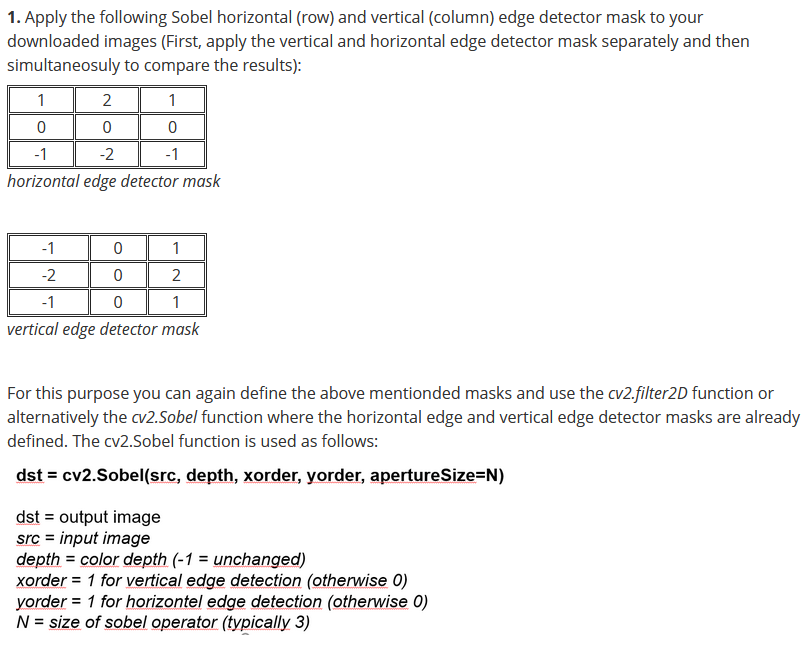



### Trying out the sobel on the three images as is

In [3]:
#   result          sobel   input           depth, xorder, yorder, size of sobel operator
sobelLondon1980 = cv.Sobel(london1980, -1, 1, 1, 3)
sobelLondon1880 = cv.Sobel(london1880, -1, 1, 1, 3)
sobelLondonStreetLife = cv.Sobel(londonStreetLife, -1, 1, 1, 10)

cv.imshow("sobel edited London1980", sobelLondon1980)
cv.imshow("sobel edited London1880", sobelLondon1880)
cv.imshow("sobel edited LondonStreetLife", sobelLondonStreetLife)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
# THIS IS HOW ITS DONE
# USE SOBEL ON EACH AXIS
sobelLondonX = cv.Sobel(london1980, -1, 1, 0, 3)
sobelLondonY = cv.Sobel(london1980, -1, 0, 1, 3)
sobelLondon = sobelLondonX + sobelLondonY

cv.imshow("sobel london", sobelLondon)
cv.waitKey(0)
cv.destroyAllWindows()

### Apply gausian and try again

london1880

In [4]:
gausianLondon = ndimage.gaussian_filter(london1880, sigma=2)

cv.imshow("Gausian filter London 1880", gausianLondon)
cv.waitKey(0)
cv.destroyAllWindows()

**sobel on the gausian filtered:**

In [5]:
sobelGausLondon = cv.Sobel(gausianLondon, -1, 1, 1, 5)

cv.imshow("Gausian filter and sobel London 1880", sobelGausLondon)
cv.waitKey(0)
cv.destroyAllWindows()

### Using 2Dfilter with custom kernel istead of sobel

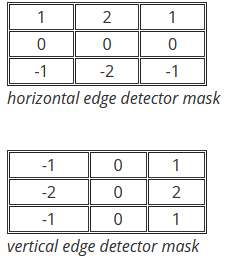

In [6]:
# define kernel / mask (HORIZONTAL)
kernel = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

In [7]:
horWoodenTable = cv.filter2D(woodenTable, -1, kernel)

cv.imshow("horizontal edge detection", horWoodenTable)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
# define kernel / mask (HORIZONTAL)
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

In [9]:
verWoodenTable = cv.filter2D(woodenTable, -1, kernel)

cv.imshow("Vertical edge detection", verWoodenTable)
cv.waitKey(0)
cv.destroyAllWindows()

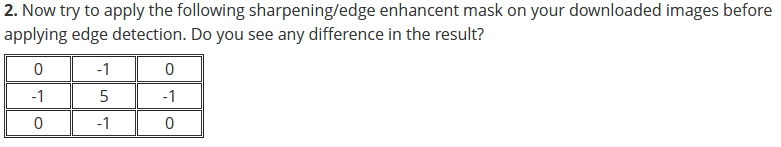

In [10]:
# sharpening/edge enhancment mask
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

In [11]:
sharpWoodenTable = cv.filter2D(woodenTable, -1, kernel)

cv.imshow("Sharpening/edge enhancment", sharpWoodenTable)
cv.waitKey(0)
cv.destroyAllWindows()

### Now try sobel on the sharpened/edge enhanced image

In [12]:
sobelSharpTable = cv.Sobel(sharpWoodenTable, -1, 1, 1, 5)

cv.imshow("Sobel Edge detection on enhanced image", sobelSharpTable)
cv.waitKey(0)
cv.destroyAllWindows()

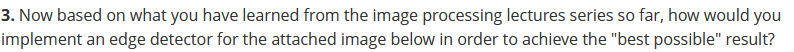

In [13]:
# picture to try and process for edge detection
ladyImg = cv.imread('face.jpg', cv.IMREAD_GRAYSCALE)

cv.imshow("Original image of lady", ladyImg)
cv.waitKey(0)
cv.destroyAllWindows()

### Lets start by using a meadian filter to get rid of "salt and pepper" noise

In [14]:
medianLady = cv.medianBlur(ladyImg, 9)

cv.imshow("median blur of lady", medianLady)
cv.waitKey(0)
cv.destroyAllWindows()

### Apply Gausian filter

In [15]:
gausLady = ndimage.gaussian_filter(medianLady, sigma=2)

cv.imshow("Gausian filter on median blur of lady", gausLady)
cv.waitKey(0)
cv.destroyAllWindows()

### Histogram Equalisation

C:\Users\savonhen\AppData\Local\Temp\ipykernel_9092\2082141360.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gausLady.flatten(),256,[0,256], color = 'r')


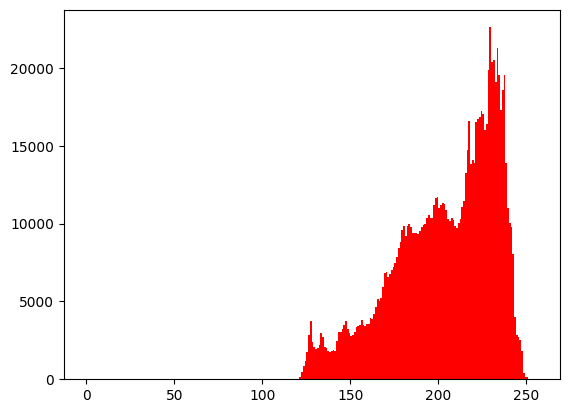

In [16]:
# histogram of image
plt.hist(gausLady.flatten(),256,[0,256], color = 'r')
plt.show()

In [17]:
# Apply Histogram Equalization
equalizedLady = cv.equalizeHist(gausLady)

cv.imshow("HE gaus median Lady", equalizedLady)
cv.waitKey(0)
cv.destroyAllWindows()

### Sharpening/edge enhancment filter (Laplacian)

In [18]:
# sharpening/edge enhancment mask
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpenedLady = cv.filter2D(equalizedLady, -1, kernel)

cv.imshow("Sharpening/edge enhancment on lady", sharpenedLady)
cv.waitKey(0)
cv.destroyAllWindows()

In [19]:
sobelLady = cv.Sobel(sharpenedLady, -1, 1, 1, 5)

cv.imshow("Sobel edge detection on lady", sobelLady)
cv.waitKey(0)
cv.destroyAllWindows()

In [20]:
# define kernel / mask (HORIZONTAL)
kernel = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

In [21]:
horEdgeDetLady = cv.filter2D(sharpenedLady, -1, kernel)

cv.imshow("Custom Horizontal edge detection on lady", horEdgeDetLady)
cv.waitKey(0)
cv.destroyAllWindows()